In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
fp=pd.read_csv(r'C:\Users\hp\Downloads\Data_Train_flight_set.csv')
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
fp.shape

(10683, 11)

In [4]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
fp.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
fp['Route']=imp.fit_transform(fp['Route'].values.reshape(-1,1))
fp['Total_Stops']=imp.fit_transform(fp['Total_Stops'].values.reshape(-1,1))

In [8]:
fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


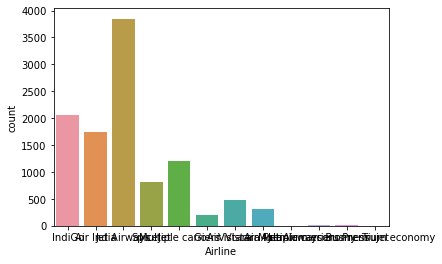

In [9]:
sns.countplot(x='Airline',data=fp)
print(fp['Airline'].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


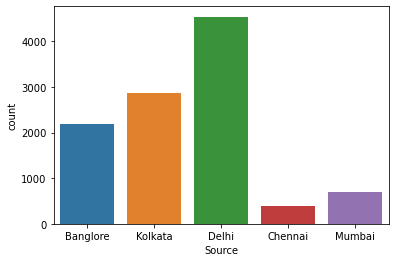

In [10]:
sns.countplot(x='Source',data=fp)
print(fp['Source'].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


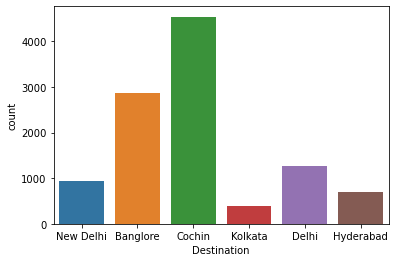

In [11]:
sns.countplot(x='Destination',data=fp)
print(fp['Destination'].value_counts())

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


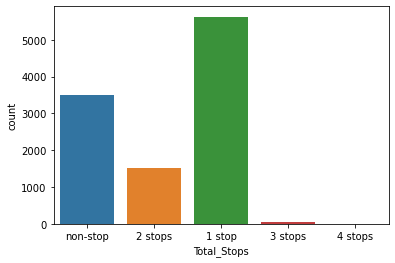

In [12]:
sns.countplot(x='Total_Stops',data=fp)
print(fp['Total_Stops'].value_counts())

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
32h 20m      1
33h 20m      1
30h 15m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64


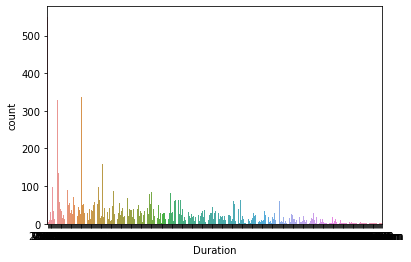

In [13]:
sns.countplot(x='Duration',data=fp)
print(fp['Duration'].value_counts())

DEL ? BOM ? COK                2377
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? BBI ? HYD                   1
CCU ? VTZ ? BLR                   1
BOM ? JAI ? DEL ? HYD             1
CCU ? RPR ? HYD ? BLR             1
BOM ? BLR ? CCU ? BBI ? HYD       1
Name: Route, Length: 128, dtype: int64


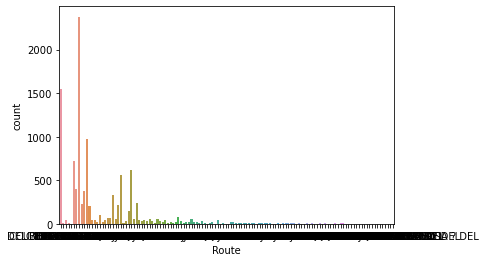

In [14]:
sns.countplot(x='Route',data=fp)
print(fp['Route'].value_counts())

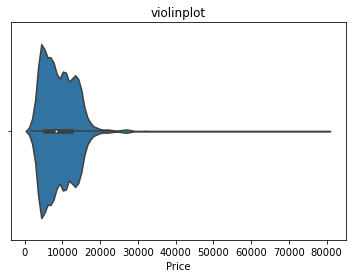

In [15]:
sns.violinplot(x='Price',data=fp)
plt.title('violinplot')
plt.show()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in fp.columns:
    if fp[i].dtype=="object":
        fp[i]=enc.fit_transform(fp[i].values.reshape(-1,1))

In [17]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302


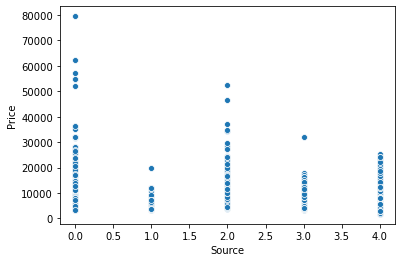

In [18]:
sns.scatterplot(x='Source',y='Price',data=fp)

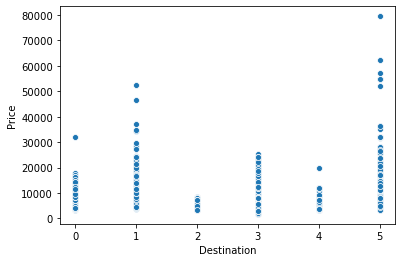

In [19]:
sns.scatterplot(x='Destination',y='Price',data=fp)

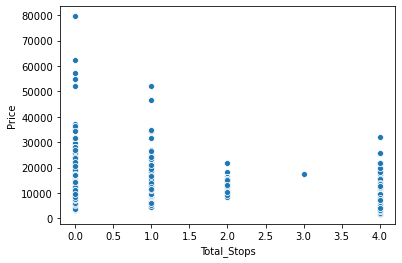

In [20]:
sns.scatterplot(x='Total_Stops',y='Price',data=fp)

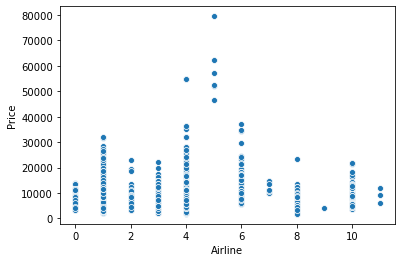

In [21]:
sns.scatterplot(x='Airline',y='Price',data=fp)

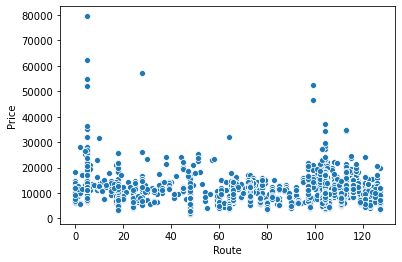

In [22]:
sns.scatterplot(x='Route',y='Price',data=fp)

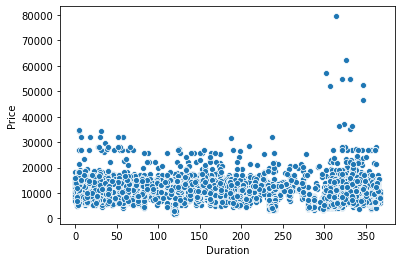

In [23]:
sns.scatterplot(x='Duration',y='Price',data=fp)

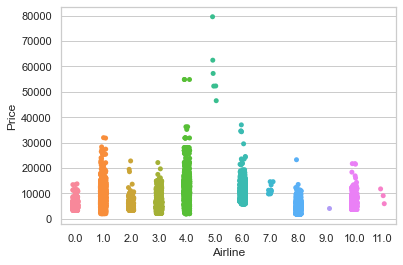

In [24]:
sns.set(style='whitegrid')
sns.stripplot(x='Airline',y='Price',data=fp)
plt.show()

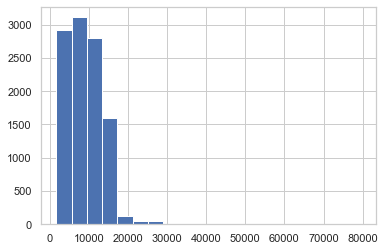

In [25]:
fp.Price.hist(bins=20)

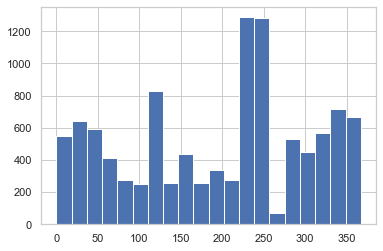

In [26]:
fp.Duration.hist(bins=20)

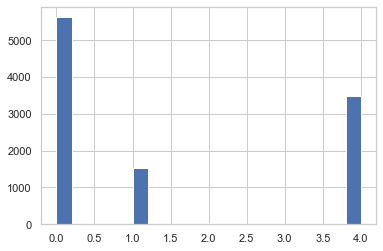

In [27]:
fp.Total_Stops.hist(bins=20)

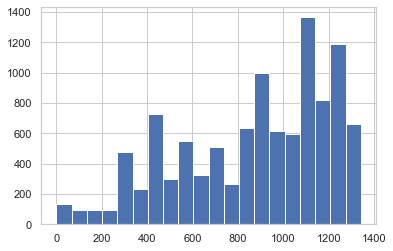

In [28]:
fp.Arrival_Time.hist(bins=20)

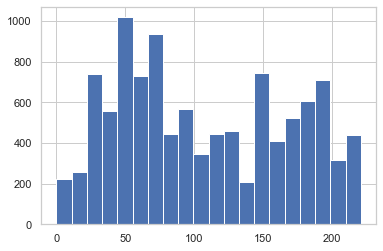

In [29]:
fp.Dep_Time.hist(bins=20)

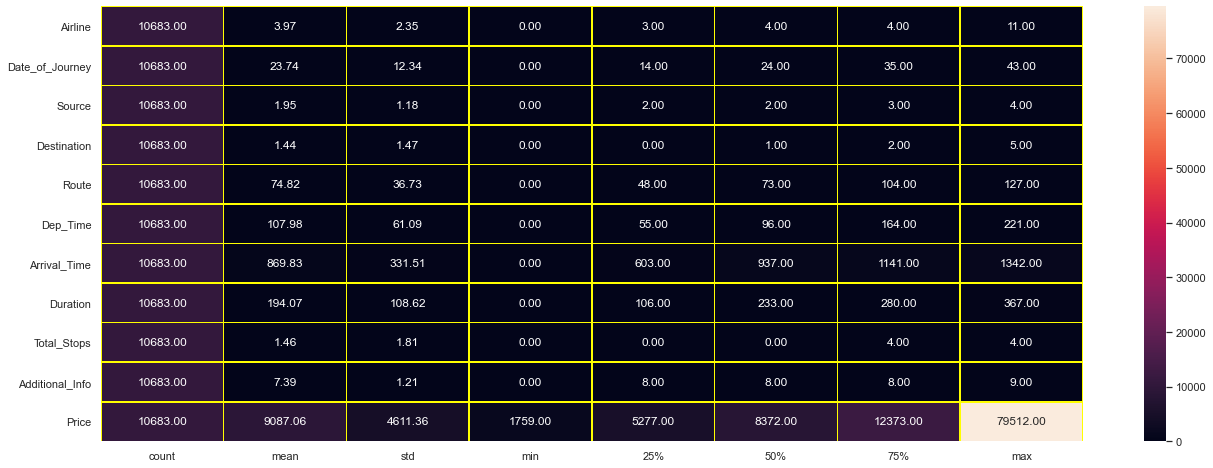

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(fp.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

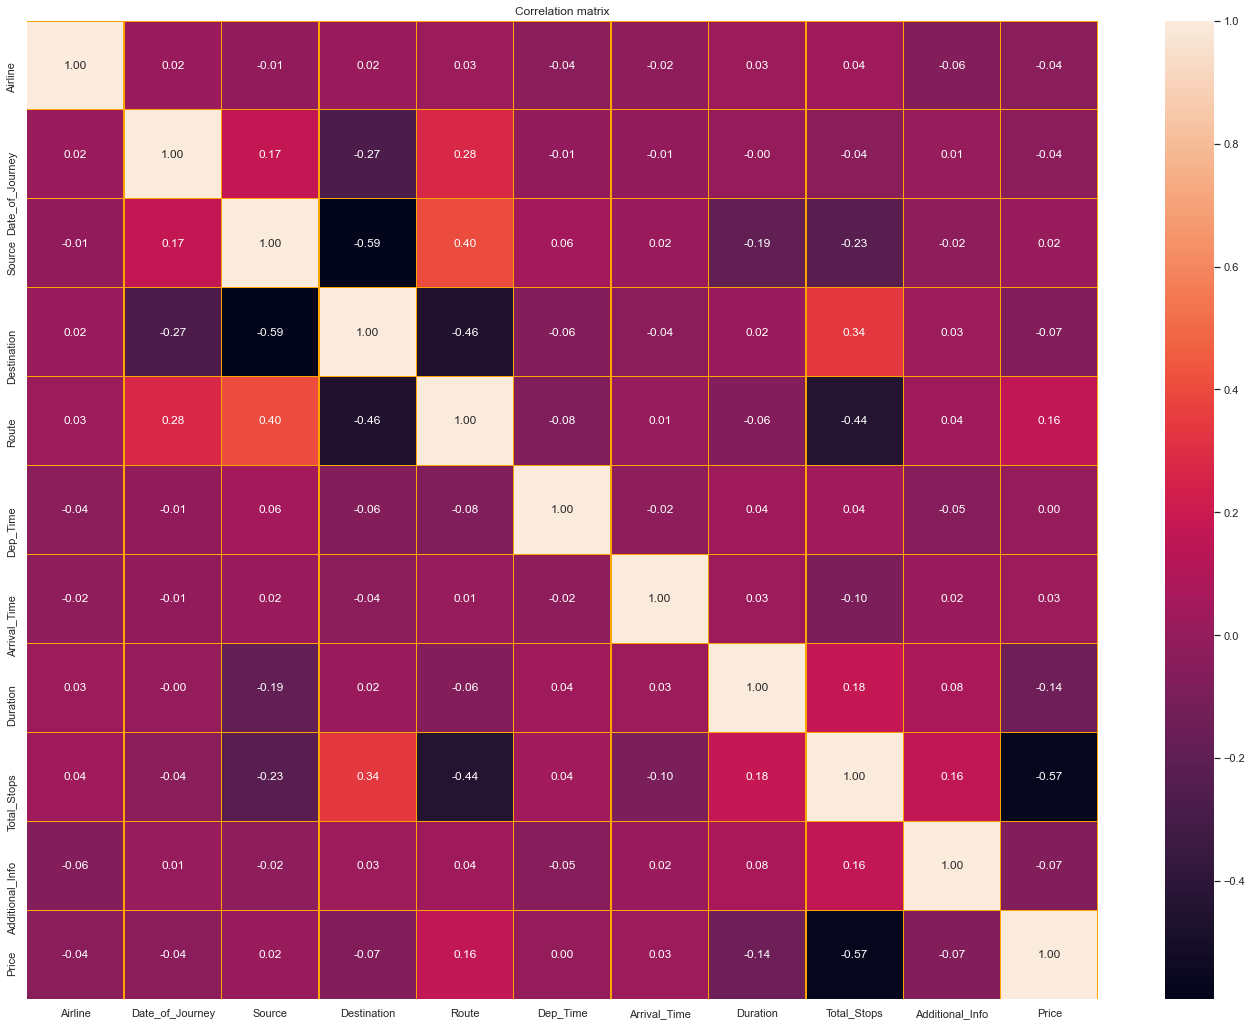

In [35]:
corr=fp.corr()                                               # multivariate analysis
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

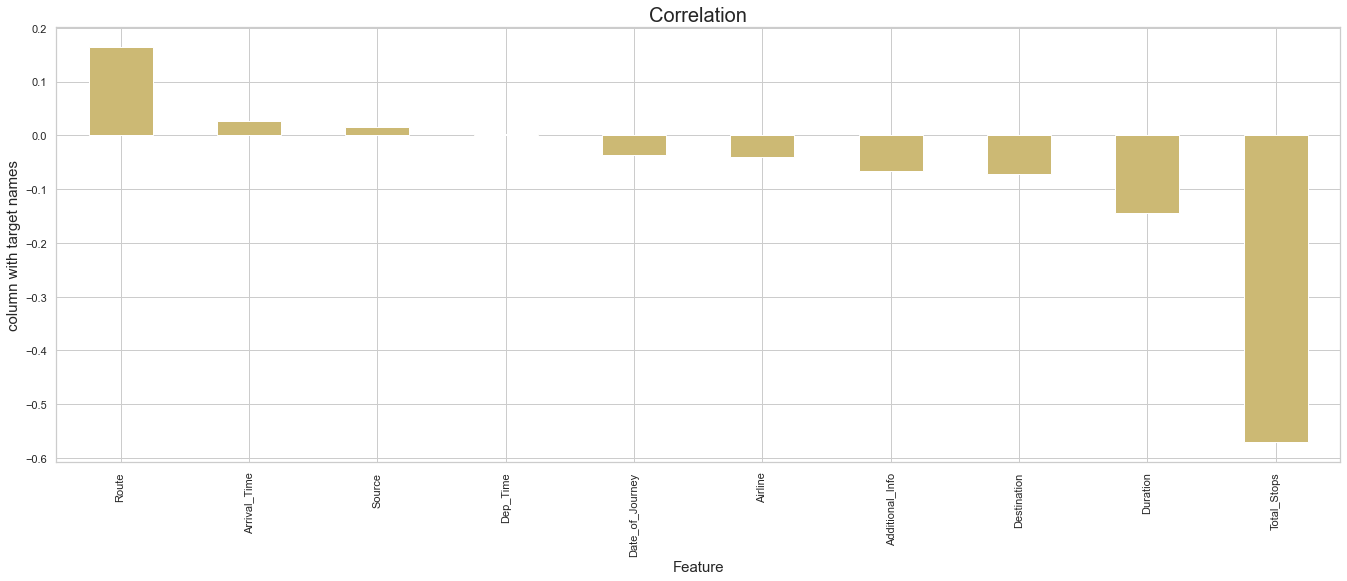

In [36]:
plt.figure(figsize=(23,8))
fp.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

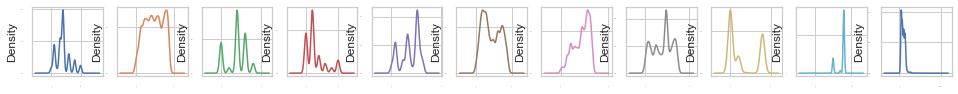

In [37]:
fp.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

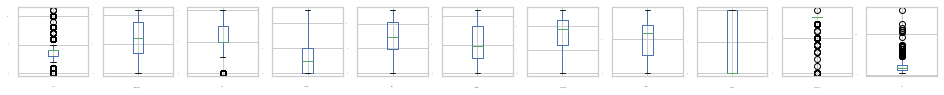

In [38]:
fp.plot(kind='box',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

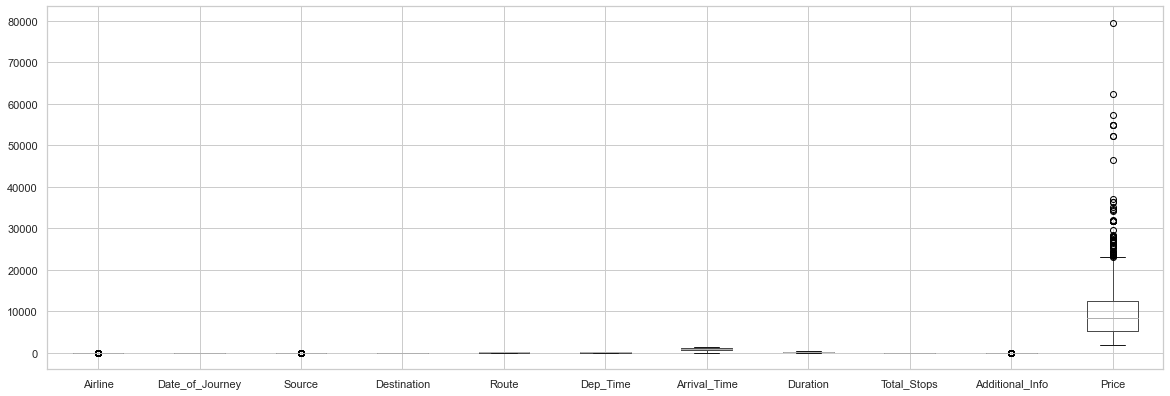

In [40]:
fp.iloc[:,0:11].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [41]:
fp.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
dtype: float64

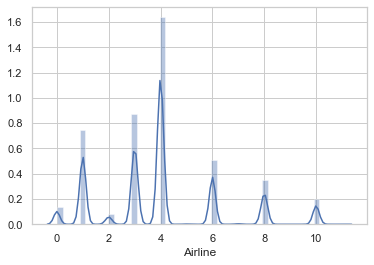

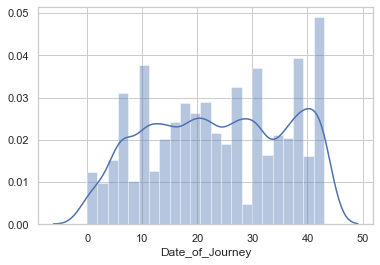

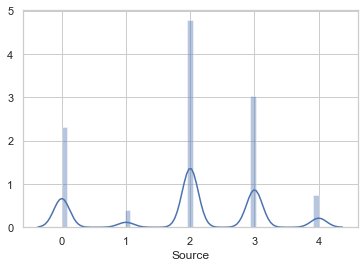

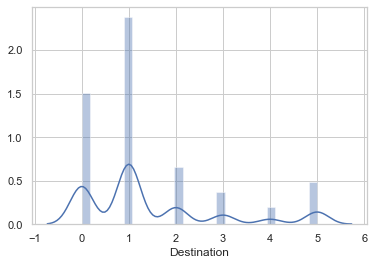

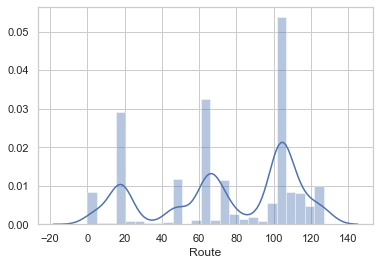

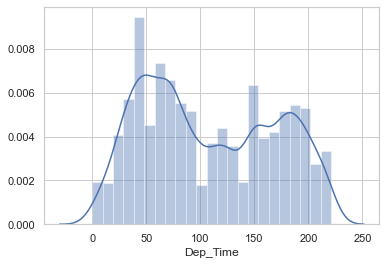

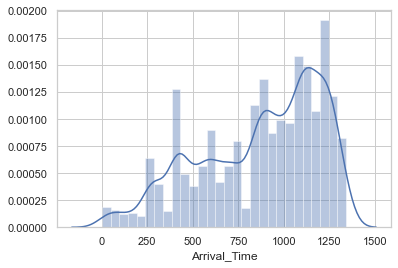

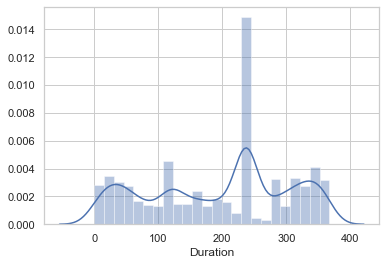

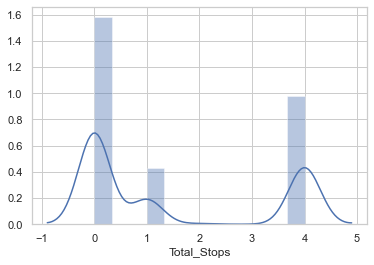

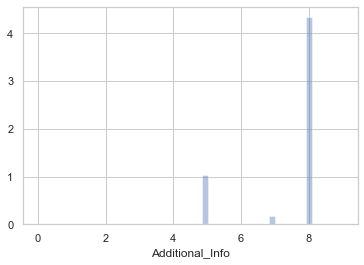

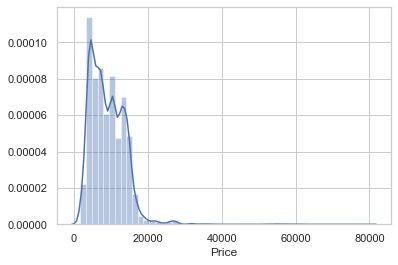

In [42]:
for j in fp.columns:
    plt.figure()
    sns.distplot(fp[j])

In [43]:
x=fp.drop(['Price'],axis=1)
y=fp['Price']

In [44]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [45]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.35223327615907807 on Random_state  1
Best Accuracy is  0.3666651676385724 on Random_state  2
Best Accuracy is  0.3666651676385724 on Random_state  2
Best Accuracy is  0.3672539169570407 on Random_state  4
Best Accuracy is  0.3672539169570407 on Random_state  4
Best Accuracy is  0.3672539169570407 on Random_state  4
Best Accuracy is  0.3719585637952507 on Random_state  7
Best Accuracy is  0.3719585637952507 on Random_state  7
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_state  9
Best Accuracy is  0.3720272867691149 on Random_

Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy is  0.3897468009989725 on Random_state  127
Best Accuracy 

Best Accuracy is  0.3980815865012004 on Random_state  192
Best Accuracy is  0.3980815865012004 on Random_state  192
Best Accuracy is  0.3980815865012004 on Random_state  192
Best Accuracy is  0.3980815865012004 on Random_state  192
Best Accuracy is  0.3980815865012004 on Random_state  192
Best Accuracy is  0.3980815865012004 on Random_state  192
Best Accuracy is  0.3980815865012004 on Random_state  192


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=192)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

predicted price [10533.78066556 10643.01030564  5680.40808006 ... 10403.27780351
  5603.56587553 11272.20299975]
actual price 3136     6582
6639     3480
2877     4544
3019     9663
4510     6442
        ...  
2066    12192
3459    10262
9532    10539
9117     5198
6710     5406
Name: Price, Length: 3205, dtype: int64
Error :-
mean absolute error :- 2608.8918130561187
mean squared error :- 11575761.914290862
root mean squared error :- 3402.317138993786
r2_score value :- 0.3980815865012004


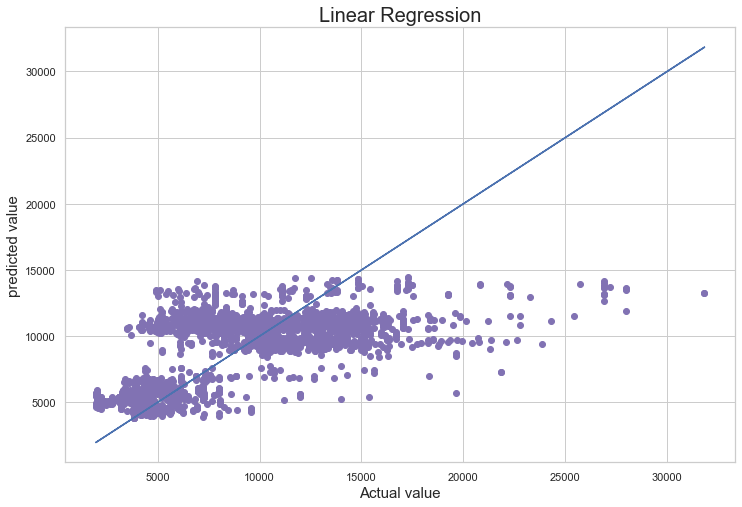

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.001, 'random_state': 1}


In [50]:
en=ElasticNet(alpha=0.001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)
print(r2)

0.39807928570026463


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.8937425354371811


In [52]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)
print(r2)

-0.7111289898833857


In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)
print(r2)

0.8093314374985764


In [54]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ln,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.3526941467101737


In [55]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(en,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.3527161123721821


In [56]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rf,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.8601586500687646


In [57]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ad,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model -0.05068980056181536


In [58]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dtr,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.7494811587331703


minimum difference is r2score and cross validation score is for RandomForestRegressor() so this is our best model.

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.8919596571185784


In [60]:
import joblib
joblib.dump(rf,'flightpricemodel.obj')

['flightpricemodel.obj']